In [1]:
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
with ZipFile('Zara Fashion.zip') as zf:
    with zf.open('Zara_Sales_Analysis.csv') as f:
        df= pd.read_csv(f, sep = ';')
df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        252 non-null    int64  
 1   Product Position  252 non-null    object 
 2   Promotion         252 non-null    object 
 3   Product Category  252 non-null    object 
 4   Seasonal          252 non-null    object 
 5   Sales Volume      252 non-null    int64  
 6   brand             252 non-null    object 
 7   url               252 non-null    object 
 8   sku               252 non-null    object 
 9   name              251 non-null    object 
 10  description       250 non-null    object 
 11  price             252 non-null    float64
 12  currency          252 non-null    object 
 13  scraped_at        252 non-null    object 
 14  terms             252 non-null    object 
 15  section           252 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory u

In [4]:
print(df.describe())

          Product ID  Sales Volume       price
count     252.000000    252.000000  252.000000
mean   153370.503968   1823.702381   86.252540
std     26160.444549    697.703748   52.083205
min    110075.000000    529.000000    7.990000
25%    131053.750000   1243.000000   49.900000
50%    151681.500000   1839.500000   79.900000
75%    175669.750000   2398.750000  109.000000
max    199631.000000   2989.000000  439.000000


In [8]:
#Managing Missing Values
print(df.isnull().sum())

Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
sku                 0
name                1
description         2
price               0
currency            0
scraped_at          0
terms               0
section             0
dtype: int64


In [5]:
#Convert data types if necessary
df['Sales Volume'] = pd.to_numeric(df['Sales Volume'], errors= 'coerce')
df['price'] = pd.to_numeric(df['price'], errors = 'coerce')
df['scraped_at'] = pd.to_datetime(df['scraped_at'], errors= 'coerce')

print('\nData types after conversion:')
print(df.dtypes)


Data types after conversion:
Product ID                   int64
Product Position            object
Promotion                   object
Product Category            object
Seasonal                    object
Sales Volume                 int64
brand                       object
url                         object
sku                         object
name                        object
description                 object
price                      float64
currency                    object
scraped_at          datetime64[ns]
terms                       object
section                     object
dtype: object


In [9]:
#Standardize Text in column names
df.columns = df.columns.str.lower().str.replace(' ', '_').str.strip()
print('\nStandardized column names:')
print(df.columns)


Standardized column names:
Index(['product_id', 'product_position', 'promotion', 'product_category',
       'seasonal', 'sales_volume', 'brand', 'url', 'sku', 'name',
       'description', 'price', 'currency', 'scraped_at', 'terms', 'section'],
      dtype='object')


In [10]:
#Strip whitespace from string columns
str_cols = df.select_dtypes(include='object').columns
df[str_cols] = df[str_cols].apply(lambda x: x.str.strip())
print('\nWhitespace removed from string columns.')
#Standardize text
df[str_cols] = df[str_cols].apply(lambda x: x.str.lower())
print('\nText standardize to lowercase')


Whitespace removed from string columns.

Text standardize to lowercase


In [11]:
for col in ['sales_volume', 'price']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df[col]= np.where(df[col] < lower, lower, df[col])
    df[col]= np.where(df[col] > upper, upper, df[col])
print("\nOutliers handled for 'sales_volume' and 'price'" )


Outliers handled for 'sales_volume' and 'price'


In [13]:
#Final Clean data
print('\nFinal cleaned dataset preview')
print(df.head())


Final cleaned dataset preview
   product_id product_position promotion product_category seasonal  \
0      185102            aisle        no         clothing       no   
1      188771            aisle        no         clothing       no   
2      180176          end-cap       yes         clothing      yes   
3      112917            aisle       yes         clothing      yes   
4      192936          end-cap        no         clothing      yes   

   sales_volume brand                                                url  \
0        2823.0  zara  https://www.zara.com/us/en/basic-puffer-jacket...   
1         654.0  zara  https://www.zara.com/us/en/tuxedo-jacket-p0889...   
2        2220.0  zara  https://www.zara.com/us/en/slim-fit-suit-jacke...   
3        1568.0  zara  https://www.zara.com/us/en/stretch-suit-jacket...   
4        2942.0  zara  https://www.zara.com/us/en/double-faced-jacket...   

                sku                  name  \
0   272145190-250-2   basic puffer jacket   
1

In [ ]:
Exploratory Data Analysis

In [15]:
#1. Top-Selling Products
top_products = df.groupby(['product_id', 'name'])['sales_volume'].sum().sort_values(ascending =False).head(10)
print('\nTop 10 Selling Products:\n', top_products)


Top 10 Selling Products:
 product_id  name                       
183825      plaid tie dye overshirt        2989.0
123047      suit jacket in 100% linen      2985.0
113435      rib collar jacket              2973.0
117590      contrasting collar jacket      2968.0
192936      double faced jacket            2942.0
172364      faux leather bomber jacket     2931.0
137990      cotton jacket                  2929.0
134429      ripped straight fit jeans      2914.0
171520      gathered waist knit sweater    2901.0
136272      purl knit sweater              2887.0
Name: sales_volume, dtype: float64


In [19]:
#2. Revnue per Product
df['revenue'] = df['sales_volume'] * df['price']
top_revenue_products = df.groupby(['product_id', 'name'])['revenue'].sum().sort_values(ascending = False).head(10)
print('\nTop 10 Products by Revenue:\n', top_revenue_products)


Top 10 Products by Revenue:
 product_id  name                                         
152723      longline quilted jacket                          481481.00
154016      wool blend textured jacket                       447174.00
152563      cashmere blend knit sweater                      434668.00
151925      vintage effect leather bomber jacket             430679.35
192936      double faced jacket                              408938.00
137598      pocket jacket                                    394621.00
110805      faux leather oversized jacket limited edition    393843.00
138779      slim fit suit jacket                             389339.00
182157      suit jacket in 100% linen                        384939.00
123824      wool blend suit jacket                           384813.00
Name: revenue, dtype: float64


In [20]:
#3. Price vs Sales correlation
corr_price_sales = df['price'].corr(df['sales_volume'])
print('\nCorrelation between Price and Sales Volume:', corr_price_sales)


Correlation between Price and Sales Volume: -0.050722961098385665


In [21]:
#4 Seasonal vs Non-Seasonal sales
seasonal_sales = df.groupby('seasonal')['sales_volume'].sum()
print('\nSeasonal vs Non-Seasonal Sales:\n',seasonal_sales)


Seasonal vs Non-Seasonal Sales:
 seasonal
no     226392.0
yes    233181.0
Name: sales_volume, dtype: float64


In [23]:
#5. Sales per Product Category
category_sales = df.groupby('product_category')['sales_volume'].sum().sort_values(ascending = False)
print('\nSales per Product Category:\n', category_sales)


Sales per Product Category:
 product_category
clothing    459573.0
Name: sales_volume, dtype: float64


In [25]:
#6. Brand Performance
brand_sales = df.groupby('brand')['sales_volume'].sum().sort_values( ascending = False)
print('\nSales per Brand: \n', brand_sales)


Sales per Brand: 
 brand
zara    459573.0
Name: sales_volume, dtype: float64


In [26]:
#7.Effect of Product Position on Sales
#Assuming lower number = higher position
position_sales = df.groupby('product_position')['sales_volume'].mean().sort_index()
print('\nAverage Sales by Product Position:\n', position_sales)


Average Sales by Product Position:
 product_position
aisle             1828.824742
end-cap           1778.255814
front of store    1873.144928
Name: sales_volume, dtype: float64


n\Top 10 SKUs by Sales Volume:
 sku
320278659-251-2     5298.0
330290387-401-2     5253.0
329282612-401-2     5206.0
318209963-800-2     5128.0
336446858-822-2     4917.0
320680326-107-39    4745.0
313008692-514-2     4689.0
330590505-500-2     4453.0
313027279-800-2     4451.0
311282631-712-2     4412.0
Name: sales_volume, dtype: float64
n\Bottom 10 SKUS by Sales Volume:
 sku
317889153-700-3     529.0
287414911-803-2     542.0
319473750-809-1     558.0
328207551-500-2     606.0
313890688-330-1     622.0
312393140-406-2     624.0
323212374-510-2     628.0
312596416-800-2     647.0
312363708-800-2     647.0
324052738-800-46    654.0
Name: sales_volume, dtype: float64


<Axes: ylabel='sku'>

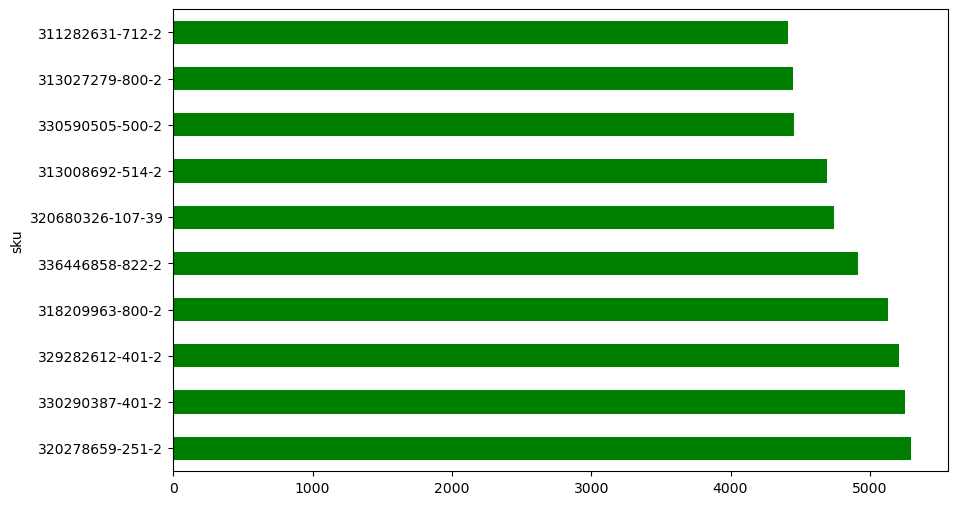

In [30]:
# 8. Top/Bottom SKU's
top_skus = df.groupby('sku')['sales_volume'].sum().sort_values(ascending = False).head(10)
bottom_skus = df.groupby('sku')['sales_volume'].sum().sort_values().head(10)
print('n\Top 10 SKUs by Sales Volume:\n', top_skus)

print('n\Bottom 10 SKUS by Sales Volume:\n', bottom_skus)

#Plot for Top SKUs
top_skus.plot(kind = 'barh', figsize = (10,6), color = 'green')

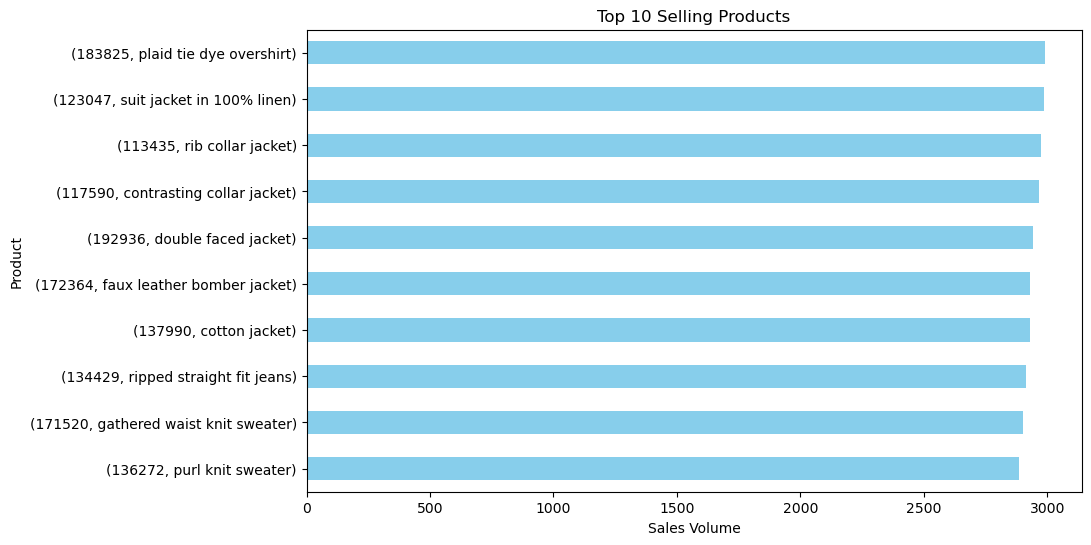

In [31]:
# 9. Price Outliers (very high and very low priced products)
low_price = df['price'].min()
high_price = df['price'].max()

top_products.plot(kind = 'barh', figsize =(10,6), color = 'skyblue')
plt.xlabel('Sales Volume')
plt.ylabel('Product')
plt.title('Top 10 Selling Products')
plt.gca().invert_yaxis()
plt.show()


Total Sales Volume per Promotion:
 promotion
no     240312.0
yes    219261.0
Name: sales_volume, dtype: float64


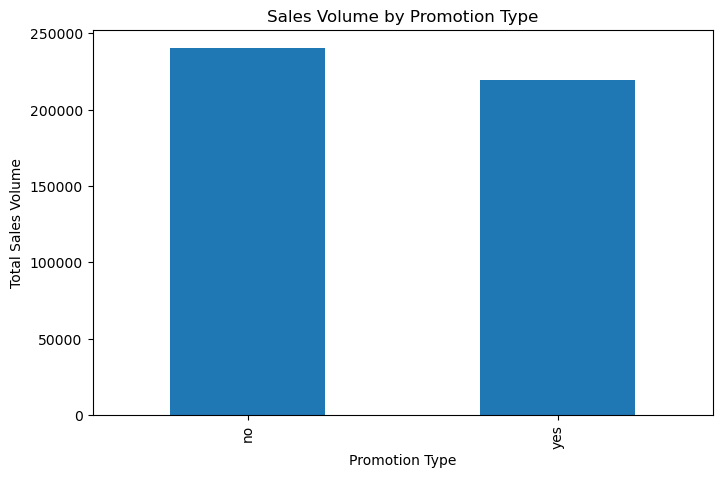

In [32]:
#1. Best-peforming promotions
promotion_sales = df.groupby('promotion')['sales_volume'].sum().sort_values(ascending = False)
print('\nTotal Sales Volume per Promotion:\n', promotion_sales)

#Plot Promotion Performance
promotion_sales.plot(kind='bar', figsize = (8,5))
plt.ylabel('Total Sales Volume')
plt.xlabel('Promotion Type')
plt.title('Sales Volume by Promotion Type')
plt.show()

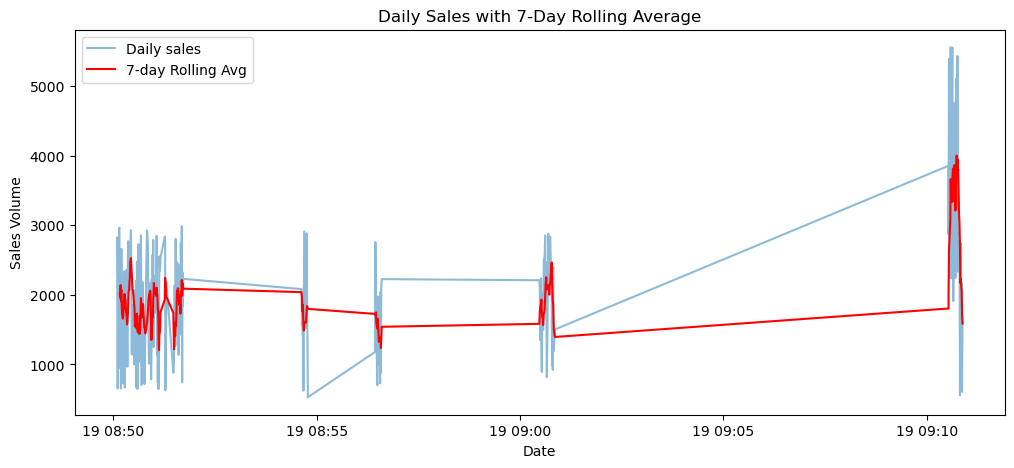

In [34]:
#Create new columns for month and quarter
df['month'] = df['scraped_at'].dt.month
df['quarter']= df['scraped_at'].dt.quarter

# Daily Sales
daily_sales = df.groupby('scraped_at')['sales_volume'].sum()
daily_sales_rolling = daily_sales.rolling(window=7).mean()

plt.figure(figsize =(12,5))
plt.plot(daily_sales, alpha =0.5, label='Daily sales')
plt.plot(daily_sales_rolling, color ='red', label = '7-day Rolling Avg')
plt.title('Daily Sales with 7-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.legend()
plt.show()

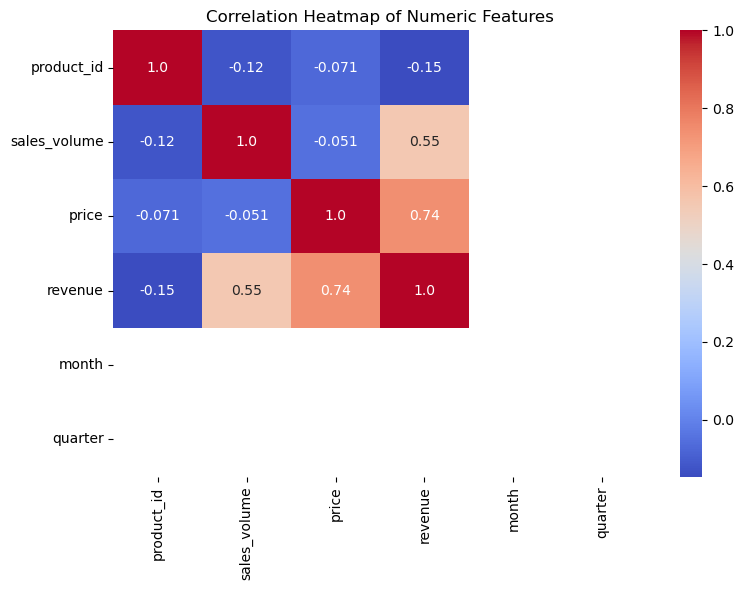

In [35]:
# Select only numeric columns
numeric_df = df.select_dtypes(include = [np.number])

#Compute correalation
corr = numeric_df.corr()

#Plot the correlation heatmap
plt.figure(figsize = (8,6))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt='.2')
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

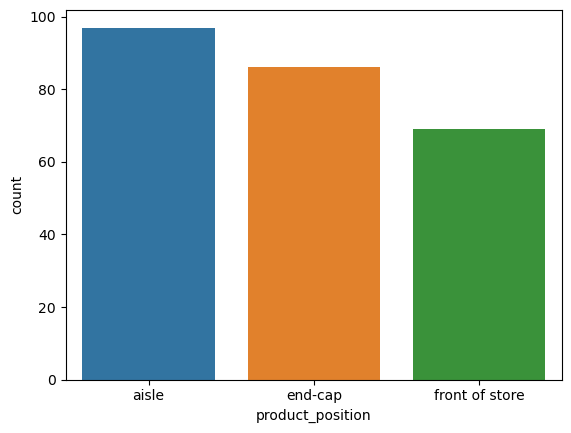

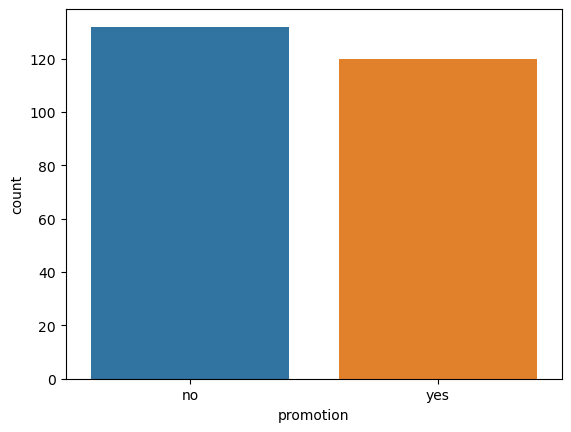

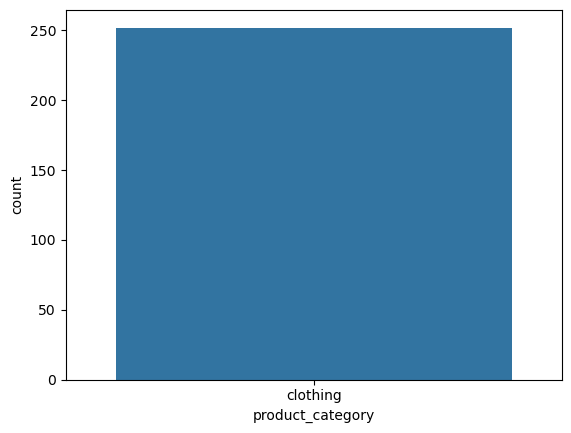

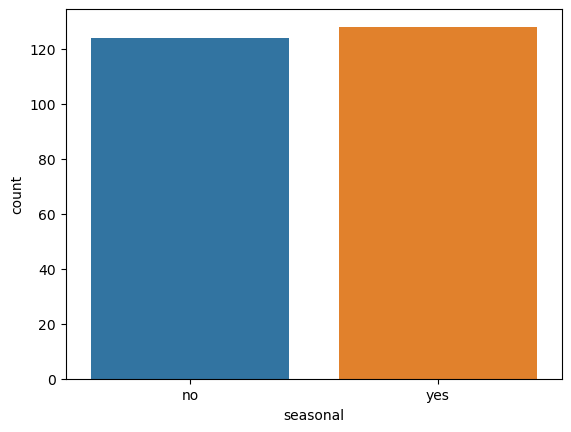

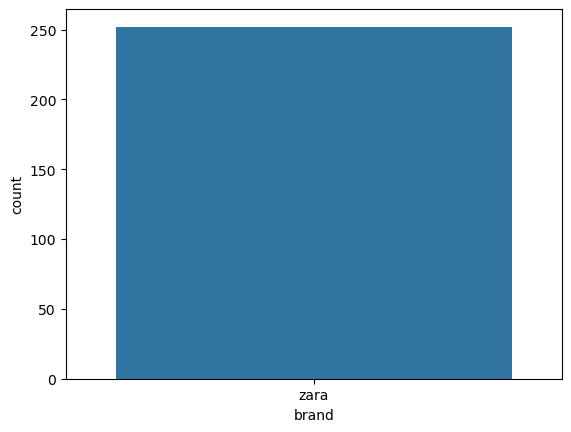

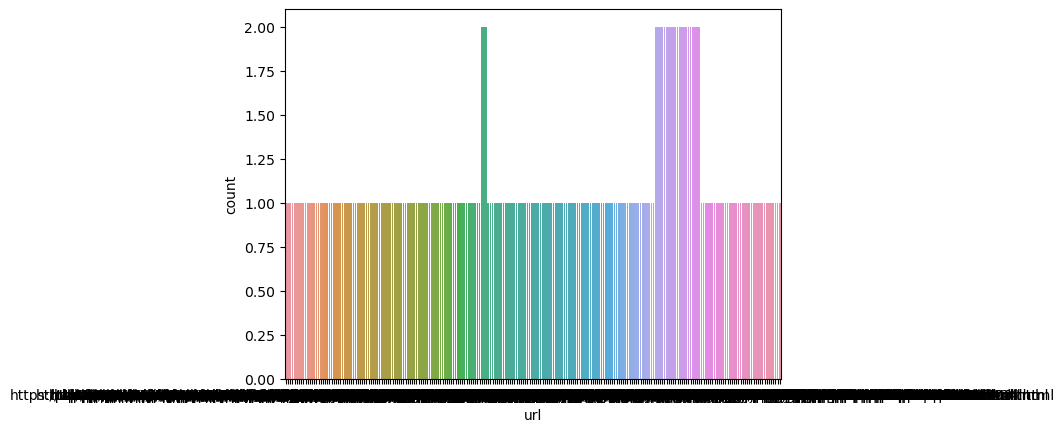

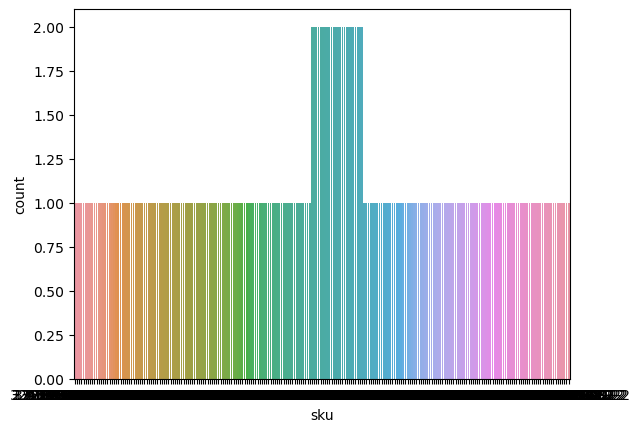

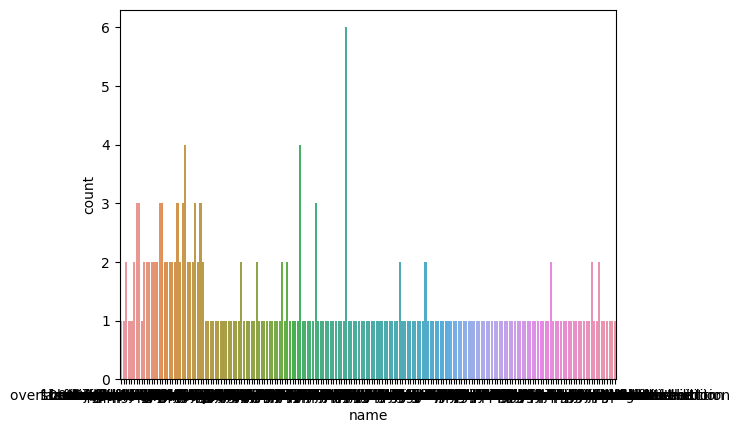

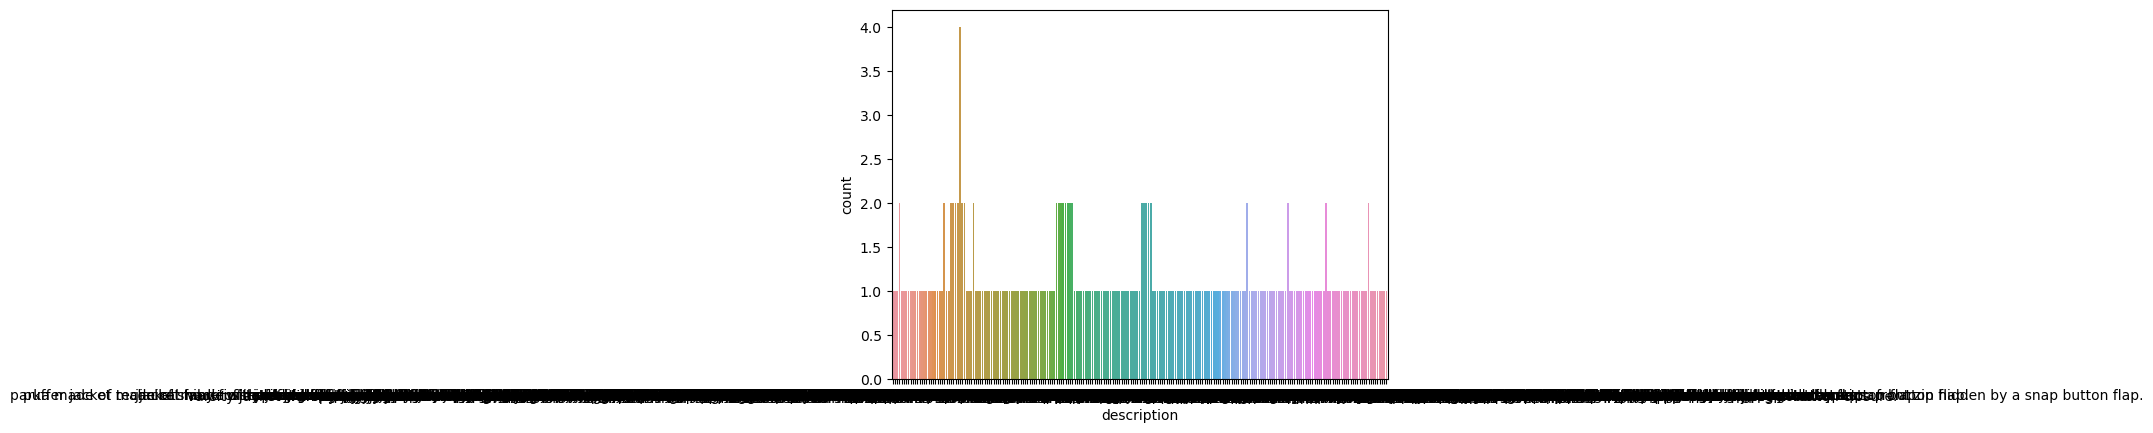

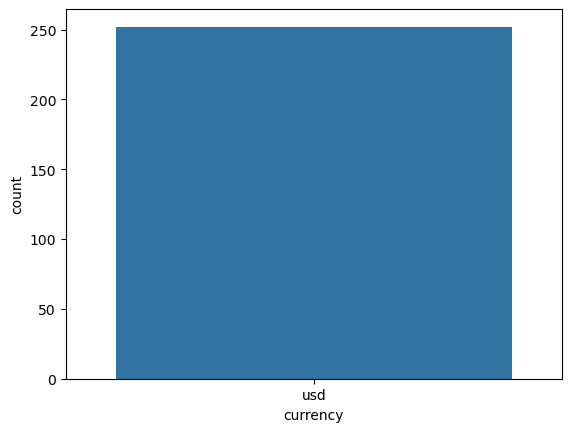

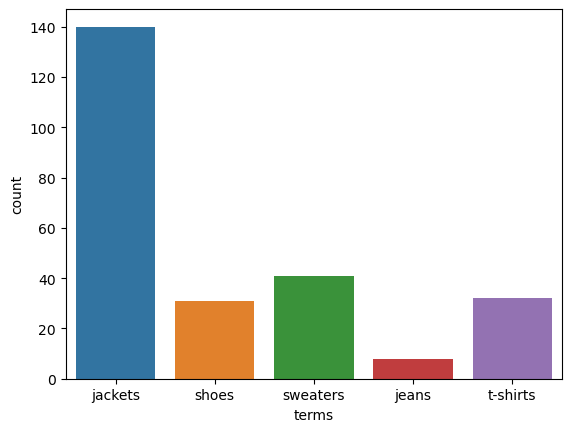

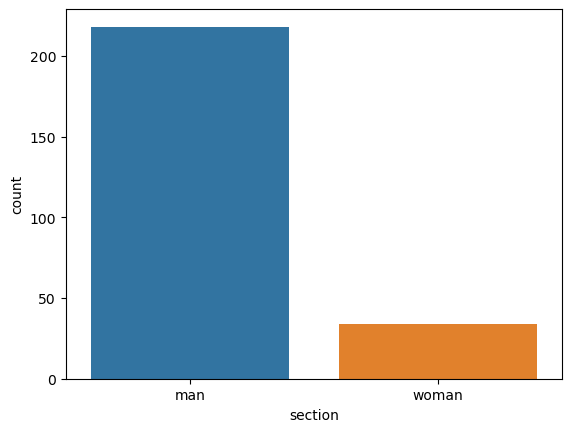

In [41]:
for col in df:
    if df[col].dtype == 'O':
        sns.countplot(x=col, data = df)
        plt.show()